In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#Import Data as Df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
#Import Data as Df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#Confirm number of rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#confirm number of rows
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
#Check Data for incosistencies
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
#Check Data for incosistencies
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
#City Data Types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
#Ride Data Types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
sum(city_data_df["type"] == 'Rural')

18

In [14]:
sum(city_data_df["type"] == 'Suburban')

36

In [15]:
sum(city_data_df["type"] == 'Urban')

66

In [16]:
# Merge the 2 Data Frames
pyber_data_df = pd.merge(city_data_df, ride_data_df, on = ['city', 'city'])

pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [17]:
urban_cities_df = pyber_data_df[pyber_data_df["type"]=='Urban']
urban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [18]:
Rural_cities_df = pyber_data_df[pyber_data_df["type"]=='Rural']
Rural_cities_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2019-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2019-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2019-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2019-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2019-04-10 20:46:11,43.25,623928772332


In [19]:
Suburban_cities_df = pyber_data_df[pyber_data_df["type"]=='Suburban']
Suburban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2019-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2019-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2019-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2019-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2019-03-15 12:09:42,31.58,2552978514662


In [20]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()['ride_id']
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [21]:
Rural_ride_count = Rural_cities_df.groupby(["city"]).count()['ride_id']
Rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [22]:
Suburban_ride_count = Suburban_cities_df.groupby(["city"]).count()['ride_id']
Suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [23]:
urban_ride_avg_fare = urban_cities_df.groupby(["city"]).mean()['fare']
urban_ride_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [24]:
Rural_ride_avg_fare = Rural_cities_df.groupby(["city"]).mean()['fare']
Rural_ride_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [25]:
Suburban_ride_avg_fare = Suburban_cities_df.groupby(["city"]).mean()['fare']
Suburban_ride_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [26]:
urban_ride_avg_driver = urban_cities_df.groupby(["city"]).mean()['driver_count']
urban_ride_avg_driver

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [27]:
Rural_ride_avg_driver = Rural_cities_df.groupby(["city"]).mean()['driver_count']
Rural_ride_avg_driver

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [28]:
Suburban_ride_avg_driver = Suburban_cities_df.groupby(["city"]).mean()['driver_count']
Suburban_ride_avg_driver

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

# Creating Urban Chart

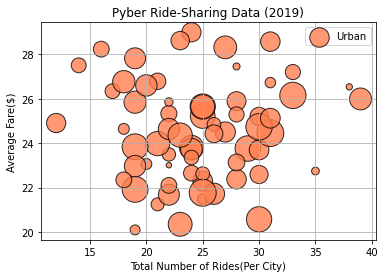

In [29]:
plt.scatter(x=urban_ride_count, y=urban_ride_avg_fare, s=10*urban_ride_avg_driver, 
            c="coral", edgecolor='k', linewidths = 1,alpha=.8, label='Urban')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides(Per City)')
plt.grid(True)
plt.legend()

# Creating Suburban Chart

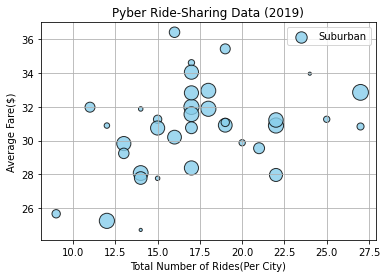

In [30]:
plt.scatter(x=Suburban_ride_count, y=Suburban_ride_avg_fare, s=10*Suburban_ride_avg_driver, 
            c="skyblue", edgecolor='k', linewidths = 1,alpha=.8, label='Suburban')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides(Per City)')
plt.grid(True)
plt.legend()

# Creating Rural Chart

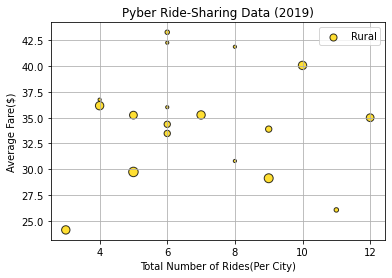

In [31]:
plt.scatter(x=Rural_ride_count, y=Rural_ride_avg_fare, s=10*Rural_ride_avg_driver, 
            c="gold", edgecolor='k', linewidths = 1,alpha=.8, label='Rural')
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides(Per City)')
plt.grid(True)
plt.legend()

# COMBINING THE 3 CHARTS TOGETHER

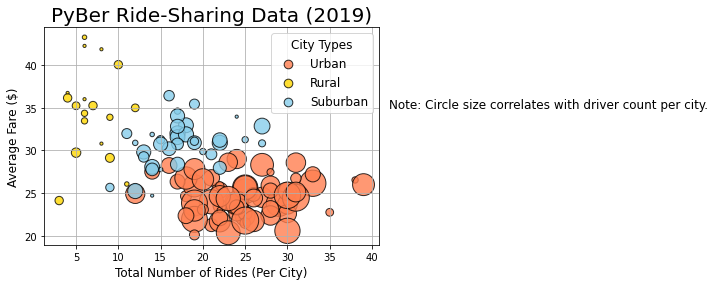

In [32]:
# Add the scatter charts for each type of city.
plt.scatter(x=urban_ride_count, y=urban_ride_avg_fare, s=10*urban_ride_avg_driver, 
            c="coral", edgecolor='k', linewidths = 1,alpha=.8, label='Urban')

plt.scatter(x=Rural_ride_count, y=Rural_ride_avg_fare, s=10*Rural_ride_avg_driver, 
            c="gold", edgecolor='k', linewidths = 1,alpha=.8, label='Rural')

plt.scatter(x=Suburban_ride_count, y=Suburban_ride_avg_fare, s=10*Suburban_ride_avg_driver, 
            c="skyblue", edgecolor='k', linewidths = 1,alpha=.8, label='Suburban')

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about circle size.
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("analysis/fig1.png")

# Show the plot
plt.show()



# Creating Legend Styles

In [33]:
# # Create a legend
# lgnd = plt.legend(fontsize="12", mode="Expanded",
#          scatterpoints=1, loc="best", title="City Types")
# lgnd.legendHandles[0]._sizes = [75]
# lgnd.legendHandles[1]._sizes = [75]
# lgnd.legendHandles[2]._sizes = [75]
# lgnd.get_title().set_fontsize(12)


# Place Text in or around the Plot

In [34]:
# #incorporate a text label about circle size.
# plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

# Save figure as an image

In [35]:
# MAKE SURE THE FOLDER YOU ARE SAVING TO ALREADY EXISTS
# plt.savefig("analysis/fig1.png")

# Breaking down the data, statistically

In [58]:
urban_cities_df.describe()

,driver_count,fare,ride_id
count,1625.000000,1625.000000,1.625000e+03
mean,36.678154,24.525772,4.873485e+12
std,20.075545,11.738649,2.907440e+12
min,3.000000,4.050000,1.458810e+10
25%,22.000000,14.550000,2.400244e+12
50%,37.000000,24.640000,4.711188e+12
75%,52.000000,34.580000,7.451579e+12
max,73.000000,44.970000,9.991538e+12


In [37]:
Suburban_cities_df.describe()

,driver_count,fare,ride_id
count,625.000000,625.000000,6.250000e+02
mean,13.712000,30.970128,4.971015e+12
std,8.042372,10.677508,2.912410e+12
min,1.000000,12.050000,3.218337e+08
25%,5.000000,21.970000,2.364253e+12
50%,16.000000,30.750000,5.053221e+12
75%,21.000000,39.830000,7.551674e+12
max,25.000000,49.960000,9.917744e+12


In [38]:
Rural_cities_df.describe()

,driver_count,fare,ride_id
count,125.000000,125.000000,1.250000e+02
mean,4.296000,34.623440,4.647746e+12
std,2.691156,14.558046,2.887834e+12
min,1.000000,10.110000,2.684873e+10
25%,1.000000,19.900000,2.275364e+12
50%,4.000000,37.050000,4.023962e+12
75%,7.000000,47.070000,7.118047e+12
max,9.000000,58.550000,9.990581e+12


In [39]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [40]:
Suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [41]:
Rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

# Pandas Mean Median and Mode

In [42]:
round(urban_ride_count.mean(),2), round(Suburban_ride_count.mean(),2), round(Rural_ride_count.mean(),2), 

(24.62, 17.36, 6.94)

In [43]:
round(urban_ride_count.median(),2), round(Suburban_ride_count.median(),2), round(Rural_ride_count.median(),2), 

(24.0, 17.0, 6.0)

In [44]:
round(urban_ride_count.mode(),2), round(Suburban_ride_count.mode(),2), round(Rural_ride_count.mode(),2) 

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

# Numpy Mean Median and SciPy mode

In [45]:
#Import Numpy and thes stats module from SciPy
import numpy as np
import scipy.stats as sts

In [46]:
# Measurements of Central Tendancy for Urban 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The average for the ride counts for urban trips is {mean_urban_ride_count:.2f}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The average for the ride counts for urban trips is {median_urban_ride_count:.2f}')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The average for the ride counts for urban trips is {mode_urban_ride_count}')

The average for the ride counts for urban trips is 24.62
The average for the ride counts for urban trips is 24.00
The average for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [47]:
# Measurements of Central Tendancy for Suburban 
mean_Suburban_ride_count = np.mean(Suburban_ride_count)
print(f'The average for the ride counts for Suburban trips is {mean_Suburban_ride_count:.2f}')

median_Suburban_ride_count = np.median(Suburban_ride_count)
print(f'The average for the ride counts for Suburban trips is {median_Suburban_ride_count:.2f}')

mode_Suburban_ride_count = sts.mode(Suburban_ride_count)
print(f'The average for the ride counts for Suburban trips is {mode_Suburban_ride_count}')

The average for the ride counts for Suburban trips is 17.36
The average for the ride counts for Suburban trips is 17.00
The average for the ride counts for Suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [48]:
# Measurements of Central Tendancy for Rural 
mean_Rural_ride_count = np.mean(Rural_ride_count)
print(f'The average for the ride counts for Rural trips is {mean_Rural_ride_count:.2f}')

median_Rural_ride_count = np.median(Rural_ride_count)
print(f'The average for the ride counts for Rural trips is {median_Rural_ride_count:.2f}')

mode_Rural_ride_count = sts.mode(Rural_ride_count)
print(f'The average for the ride counts for Rural trips is {mode_Rural_ride_count}')

The average for the ride counts for Rural trips is 6.94
The average for the ride counts for Rural trips is 6.00
The average for the ride counts for Rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


# Summary Stats for Fare/City

In [49]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.93
1    14.00
2    17.92
3    10.26
4    23.00
Name: fare, dtype: float64

In [50]:
# Measurements of Central Tendancy for Urban 
mean_urban_fares = np.mean(urban_fares)
print(f'The average for the ride fares for urban trips is ${mean_urban_fares:.2f}')

median_urban_fares = np.median(urban_fares)
print(f'The median for the ride fares for urban trips is ${median_urban_fares:.2f}')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode for the ride fares for urban trips is ${mode_urban_fares}')

The average for the ride fares for urban trips is $24.53
The median for the ride fares for urban trips is $24.64
The mode for the ride fares for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [51]:
Rural_fares = Rural_cities_df["fare"]
mean_Rural_fares = np.mean(Rural_fares)
print(f'The average for the ride fares for Rural trips is ${mean_Rural_fares:.2f}')

median_Rural_fares = np.median(Rural_fares)
print(f'The median for the ride fares for Rural trips is ${median_Rural_fares:.2f}')

mode_Rural_fares = sts.mode(Rural_fares)
print(f'The mode for the ride fares for Rural trips is ${mode_Rural_fares}')

The average for the ride fares for Rural trips is $34.62
The median for the ride fares for Rural trips is $37.05
The mode for the ride fares for Rural trips is $ModeResult(mode=array([37.05]), count=array([2]))


In [52]:
Suburban_fares = Suburban_cities_df["fare"]
mean_Suburban_fares = np.mean(Suburban_fares)
print(f'The average for the ride fares for Suburban trips is ${mean_Suburban_fares:.2f}')

median_Suburban_fares = np.median(Suburban_fares)
print(f'The median for the ride fares for Suburban trips is ${median_Suburban_fares:.2f}')

mode_Suburban_fares = sts.mode(Suburban_fares)
print(f'The mode for the ride fares for Suburban trips is ${mode_Suburban_fares}')

The average for the ride fares for Suburban trips is $30.97
The median for the ride fares for Suburban trips is $30.75
The mode for the ride fares for Suburban trips is $ModeResult(mode=array([17.99]), count=array([3]))


# Summary Stats for teh Number of Drivers/City

In [59]:
# Get the driver count data from Urban cities
urban_drivers = urban_cities_df["driver_count"]
mean_urban_drivers = np.mean(urban_drivers)
print(f'The average for the ride drivers for urban trips is ${mean_urban_drivers:.2f}')

median_urban_drivers = np.median(urban_drivers)
print(f'The median for the ride drivers for urban trips is ${median_urban_drivers:.2f}')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode for the ride drivers for urban trips is ${mode_urban_drivers}')

The average for the ride drivers for urban trips is $36.68
The median for the ride drivers for urban trips is $37.00
The mode for the ride drivers for urban trips is $ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [62]:
Suburban_drivers = Suburban_cities_df["driver_count"]
mean_Suburban_drivers = np.mean(Suburban_drivers)
print(f'The average # drivers for Suburban areas is {mean_Suburban_drivers:.2f}')

median_Suburban_drivers = np.median(Suburban_drivers)
print(f'The median # drivers for Suburban areas is {median_Suburban_drivers:.2f}')

mode_Suburban_drivers = sts.mode(Suburban_drivers)
print(f'The mode # of drivers for Suburban areas is {mode_Suburban_drivers}')

The average # drivers for Suburban areas is 13.71
The median # drivers for Suburban areas is 16.00
The mode # of drivers for Suburban areas is ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [63]:
Rural_drivers = Rural_cities_df["driver_count"]
mean_Rural_drivers = np.mean(Rural_drivers)
print(f'The average for the ride drivers for Rural trips is ${mean_Rural_drivers:.2f}')

median_Rural_drivers = np.median(Rural_drivers)
print(f'The median for the ride drivers for Rural trips is ${median_Rural_drivers:.2f}')

mode_Rural_drivers = sts.mode(Rural_drivers)
print(f'The mode for the ride drivers for Rural trips is ${mode_Rural_drivers}')

The average for the ride drivers for Rural trips is $4.30
The median for the ride drivers for Rural trips is $4.00
The mode for the ride drivers for Rural trips is $ModeResult(mode=array([1], dtype=int64), count=array([32]))


# Box-and-Whisker Plots for Ride Count Data

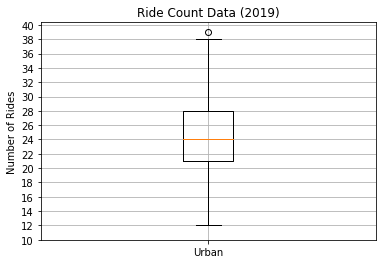

In [67]:
#creating a box & whisker plot for urban cities
# Xaxis labels
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
# Add in the Title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

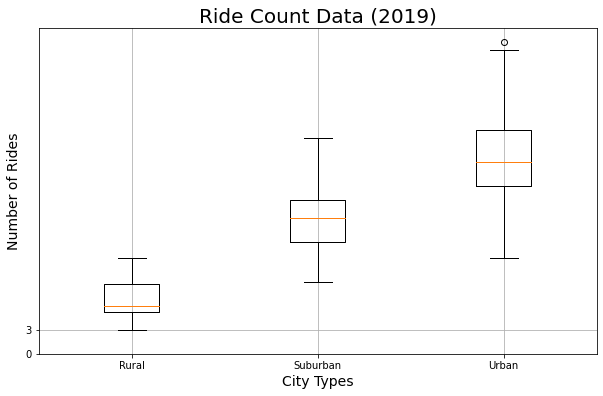

In [68]:
# Add all ride count box & whisker plots to the same graph
x_labels= ['Rural', 'Suburban', 'Urban']
ride_count_data = [Rural_ride_count,Suburban_ride_count,urban_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,5,step=3.0))
ax.grid()
plt.savefig('analysis/fig2.png')
plt.show()

In [69]:
# Get the City that matches 39
urban_city_outliers = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outliers} has the highest rider count.')

West Angela has the highest rider count.


# Box & Whisker Plots for Ride Fare Data

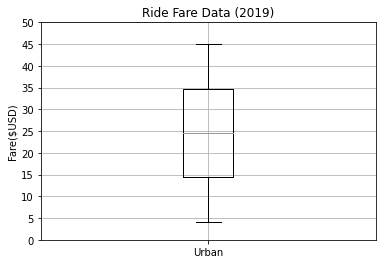

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [70]:
# Create a box & whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

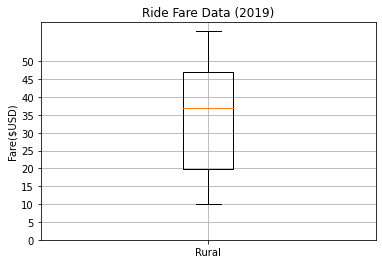

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [71]:
# Crate a box & whisker plot for the Rural fare data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(Rural_fares, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
Rural_fares.describe()

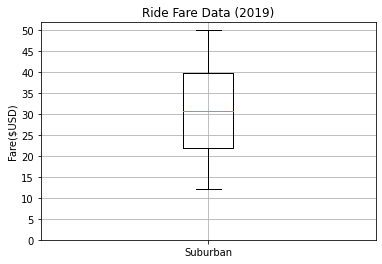

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [72]:
# Create a box & whisker plot for the Suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(Suburban_fares, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
Suburban_fares.describe()

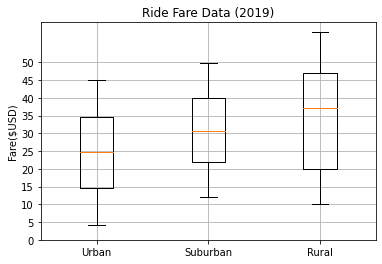

Summary Statistics


AttributeError: 'list' object has no attribute 'describe'

In [73]:
# Create a box & whisker plot for the urban fare data
x_labels = ["Urban", "Suburban", "Rural"]
city_fares = [urban_fares, Suburban_fares, Rural_fares]
fig, ax = plt.subplots()
ax.boxplot(city_fares, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
city_fares.describe()

# Percentage of Fares for Each City Type

In [77]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [78]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [80]:
type_percents = sum_fares_by_type/total_fares *100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

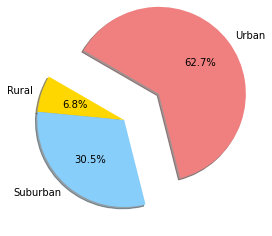

In [90]:
explode = 0,0,0.5

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], explode = explode,
       colors=['gold', 'lightskyblue', 'lightcoral'], autopct='%1.1f%%', shadow=True, startangle=150)
plt_title = ('% of Total Fares by City Type')

plt.show()

# CHANGING FONT size for Pie Chart

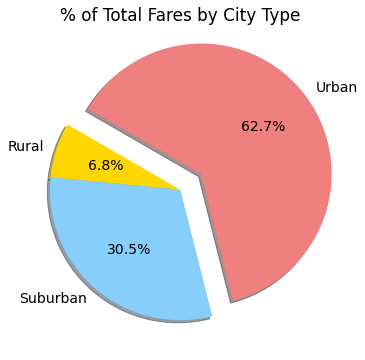

In [115]:
explode = 0,0,0.2
#import mpl to change plot configurations
import matplotlib as mpl
#Build chart
plt.subplots(figsize=(10,6))

plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], 
        explode = explode,
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=150)
plt.title('% of Total Fares by City Type')

#Change the Font Size
mpl.rcParams['font.size'] = 14
plt.show()

In [104]:
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [105]:
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [106]:
type_rides_percents = sum_rides_by_type/total_rides *100
type_rides_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

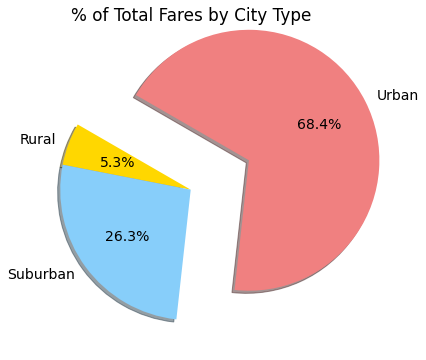

In [112]:
explode = 0,0,0.5
#import mpl to change plot configurations
import matplotlib as mpl
#Build chart
plt.subplots(figsize=(10,6))

plt.pie(type_rides_percents, labels=["Rural", "Suburban", "Urban"], 
        explode = explode,
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=150)
plt.title("% of Total Fares by City Type")

#Change the Font Size
mpl.rcParams['font.size'] = 14
plt.show()

In [128]:
sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [129]:
total_drivers = city_data_df["driver_count"].sum()
total_drivers

2973

In [130]:
type_drivers_percents = sum_drivers_by_type/total_drivers *100
type_drivers_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

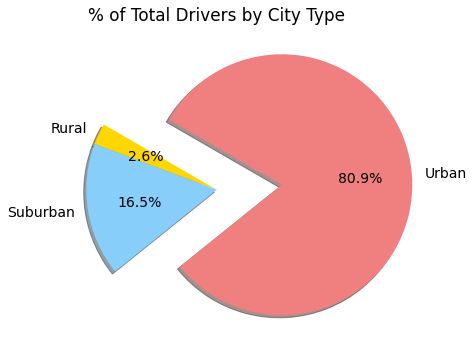

In [131]:
explode = 0,0,0.5
#import mpl to change plot configurations
import matplotlib as mpl
#Build chart
plt.subplots(figsize=(10,6))

plt.pie(type_drivers_percents, labels=["Rural", "Suburban", "Urban"], 
        explode = explode,
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=150)
plt.title("% of Total Drivers by City Type")

#Change the Font Size
mpl.rcParams['font.size'] = 14
plt.show()